In [39]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from hist.stack import Stack

sys.path.append("../..")
from HistogramLib.store import HistogramStore
from HistogramLib.plot_manager import PlotManager
from HistogramLib.bokeh.histogram_widget import *
from hists.parameters import beamEnergies
from hists.store import HistogramId
from bokeh_apps.widgets import *
trueBeamEnergyMap = {20 : 20, 30 : 30, 50 : 49.99, 80 : 79.93, 100 : 99.83, 120 : 119.65, 150 : 149.14, 200 : 197.32, 250 : 243.61, 300 : 287.18}

In [2]:
hist_folder = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/clue3d/v19'
histStore = HistogramStore(hist_folder, HistogramId)

In [15]:
def getClue3DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("Clus3DClusteredEnergy", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy), "mainOrAllTracksters":hist.loc("mainTrackster")}]
        .project("clus3D_energy")
    )
def getClue2DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("EnergyClustered2DPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("clus2D_energy_sum")
    )
def getRechitsProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("rechits_energy_sum")
    )

In [16]:
histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", "data")).getHistogram(HistogramKind.COUNT)

Hist(
  IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  Regular(2000, 0, 350, name='rechits_energy_sum', label='Total reconstructed energy per event (GeV)'),
  storage=Double()) # Sum: 1151368.0 (1151393.0 with flow)

In [47]:
def plot(datatype, beamEnergy, xLim=None):
    plt.figure()
    if xLim is None:
        xLim = trueBeamEnergyMap[beamEnergy] - 40, trueBeamEnergyMap[beamEnergy]+10
    plt.xlim(xLim)
    hep.histplot([getRechitsProjected(datatype, beamEnergy), getClue2DProjected(datatype, beamEnergy), getClue3DProjected(datatype, beamEnergy)], 
        yerr=False, label=["Energy reconstructed", "Energy clustered by CLUE", "Energy clustered by CLUE3D"])
    
    hep.cms.text("Preliminary")
    hep.cms.lumitext("e+ "+ str(beamEnergy) + " GeV")
    plt.legend(loc='upper left')
    plt.show()

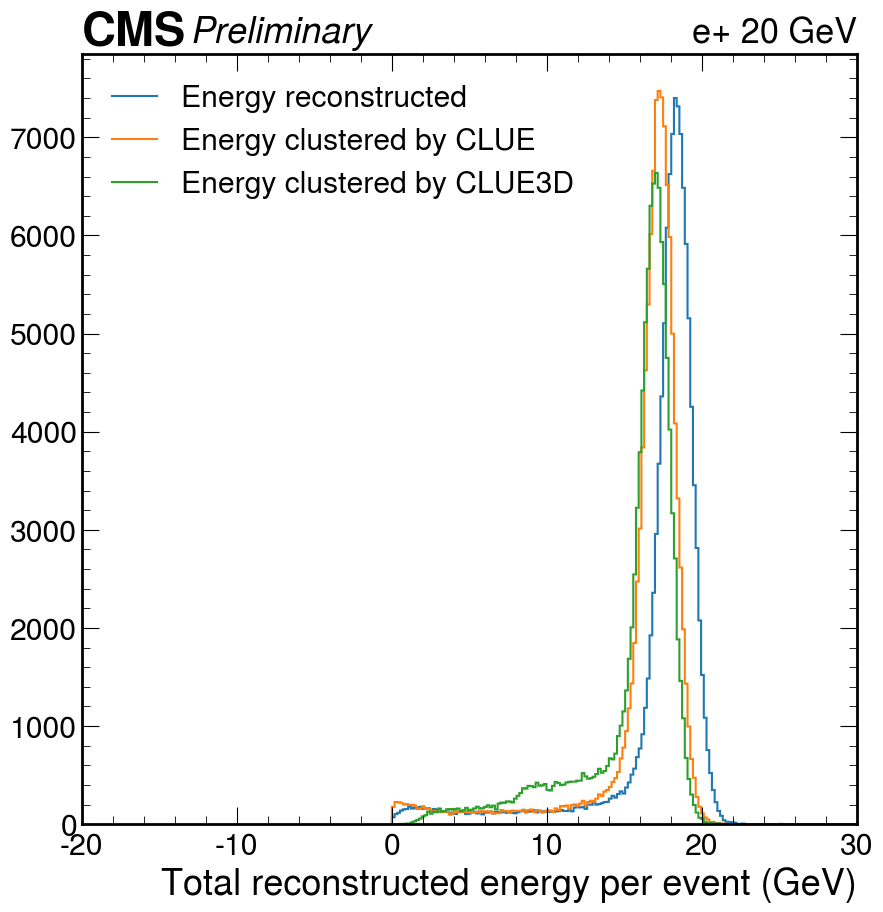

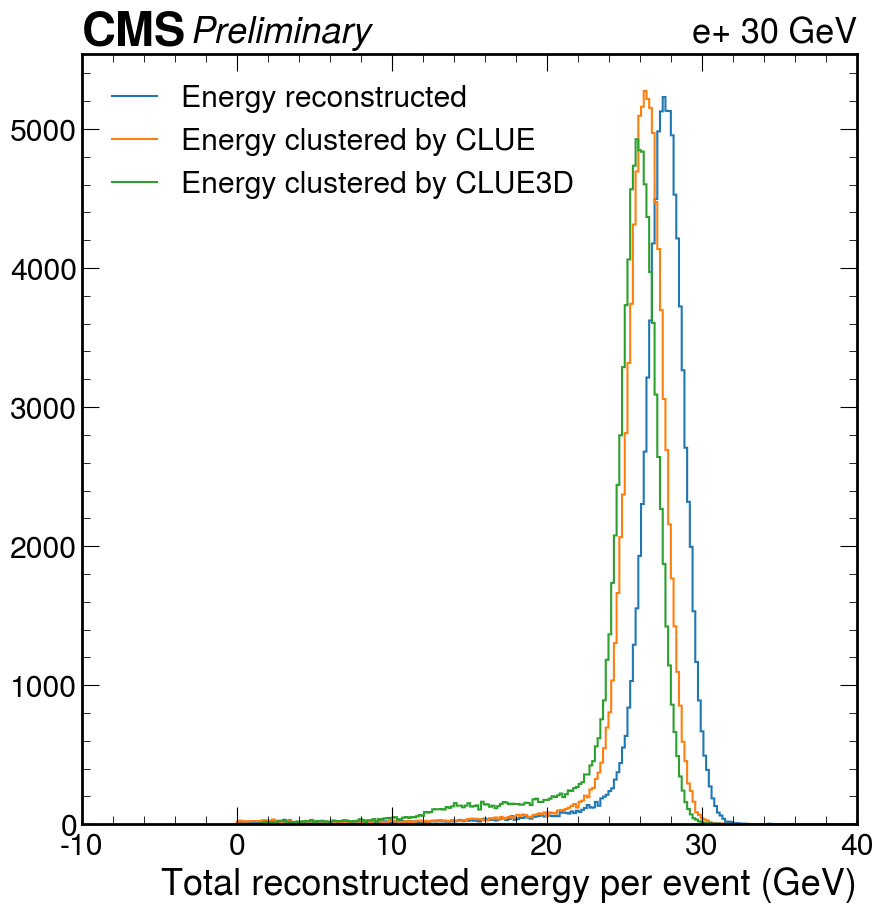

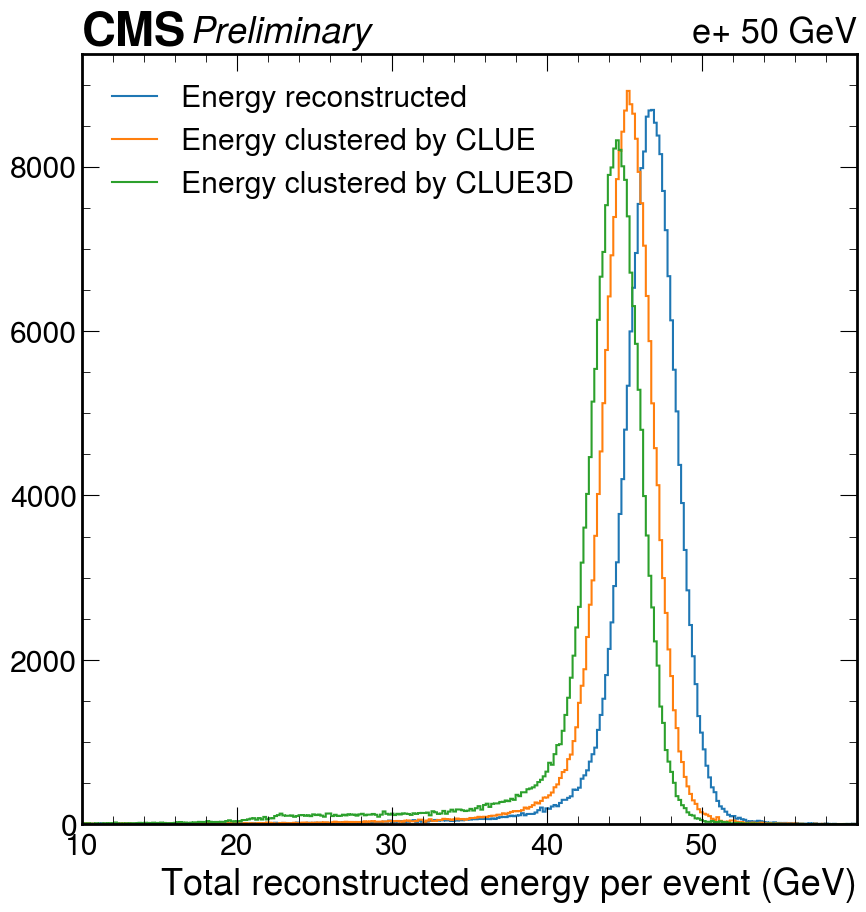

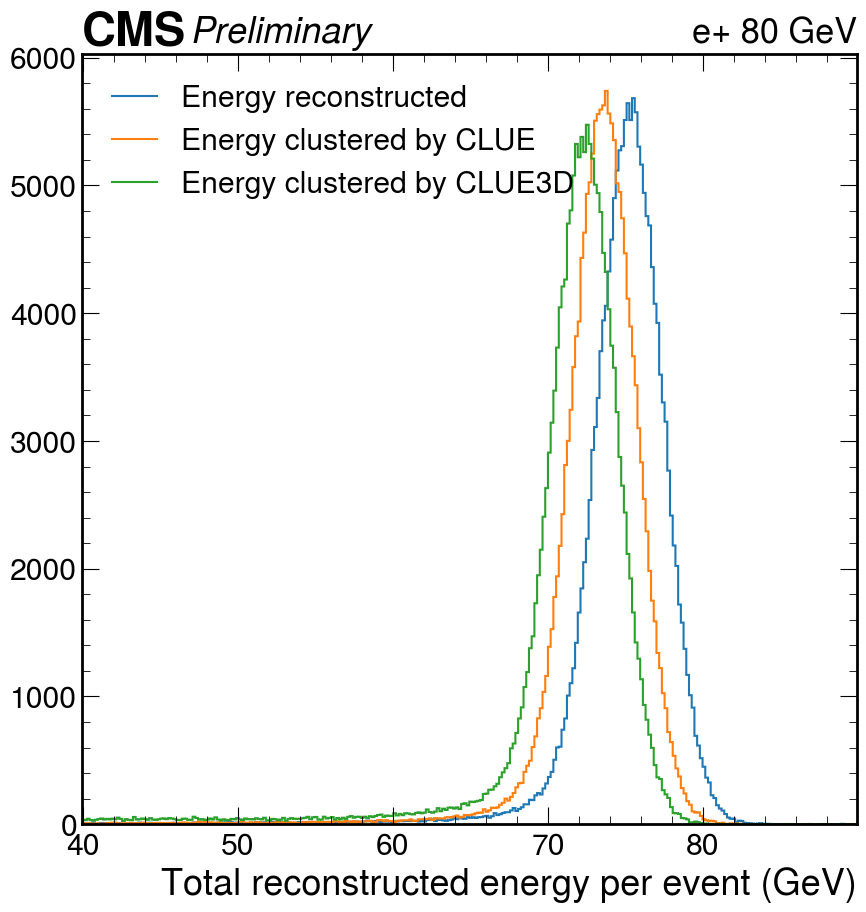

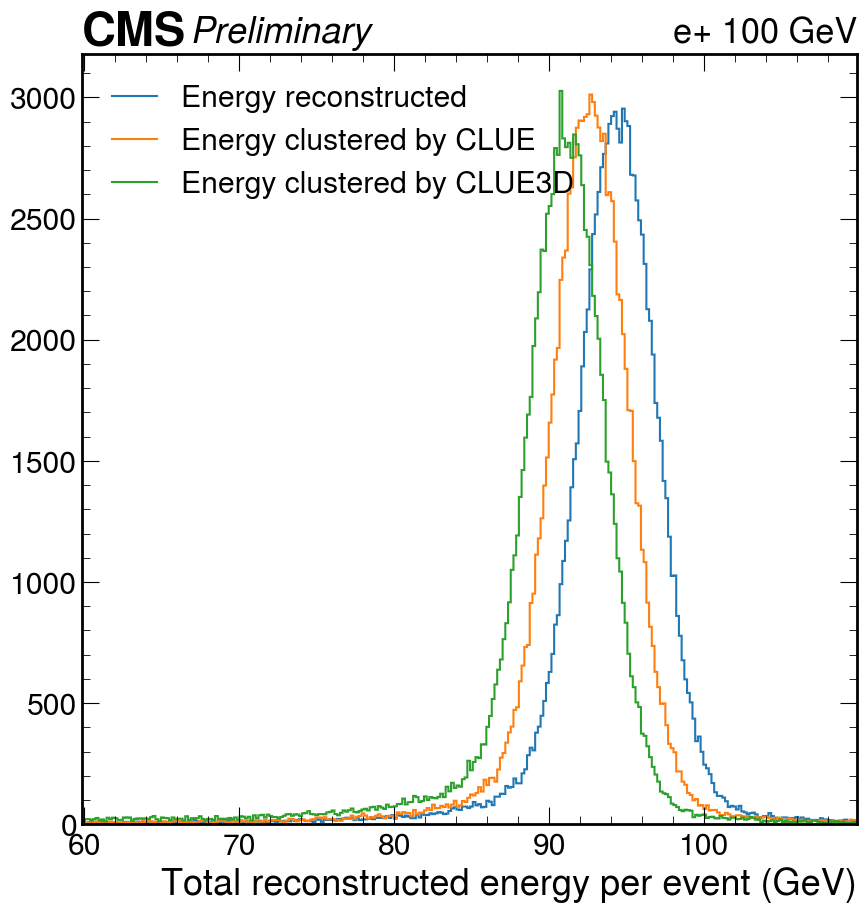

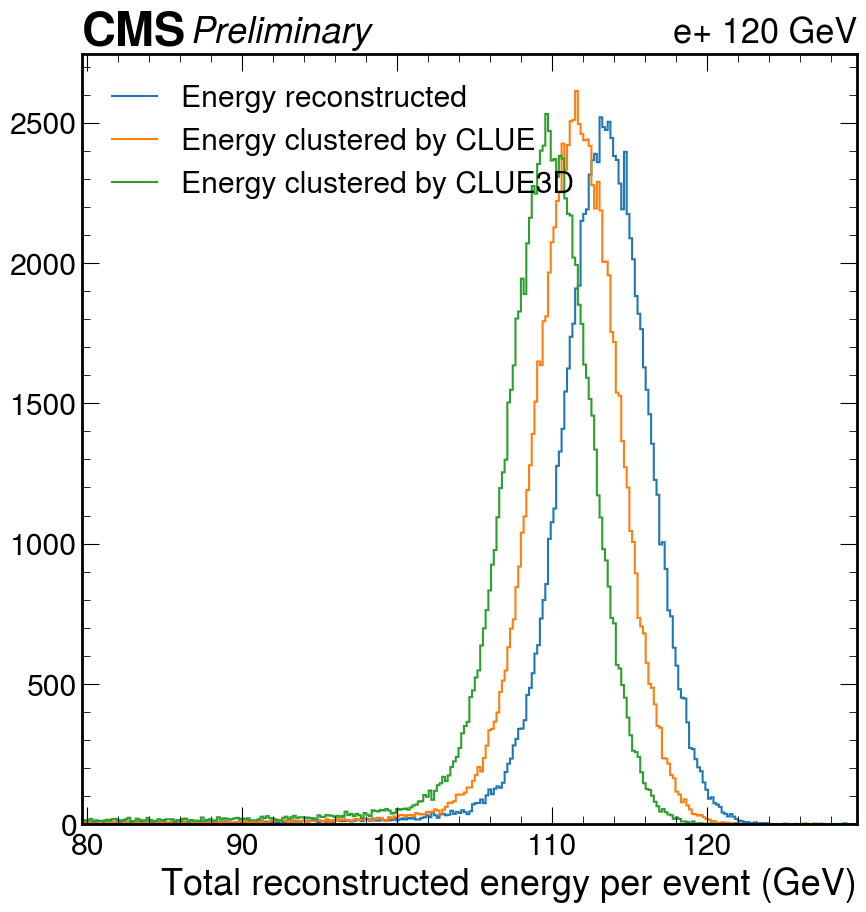

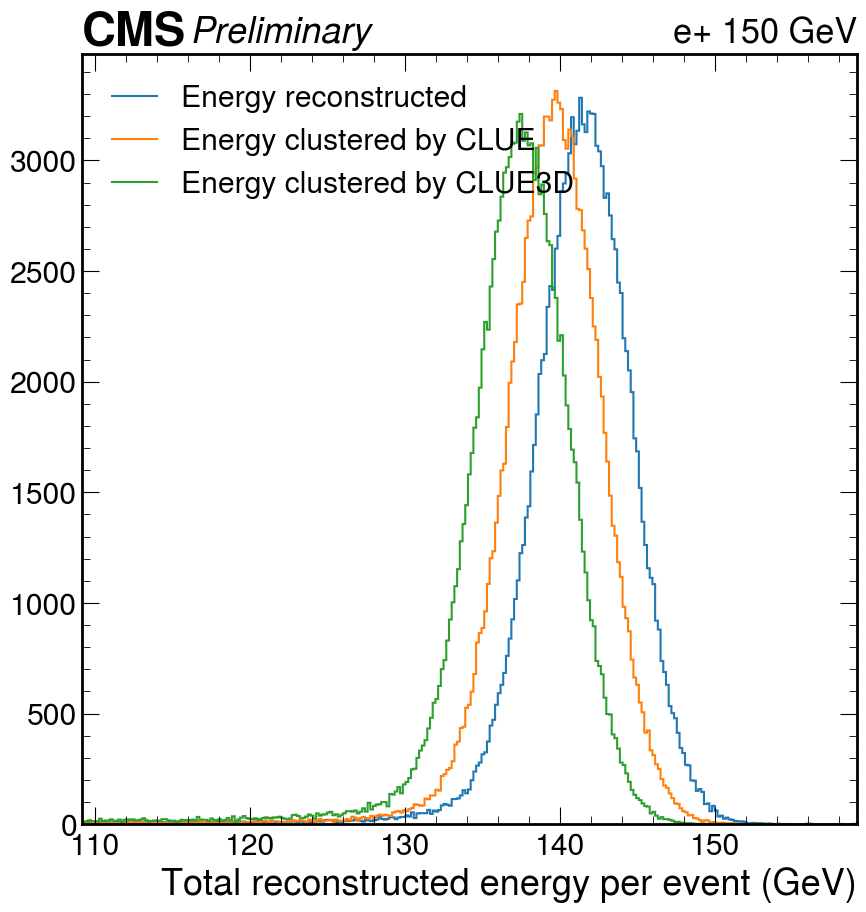

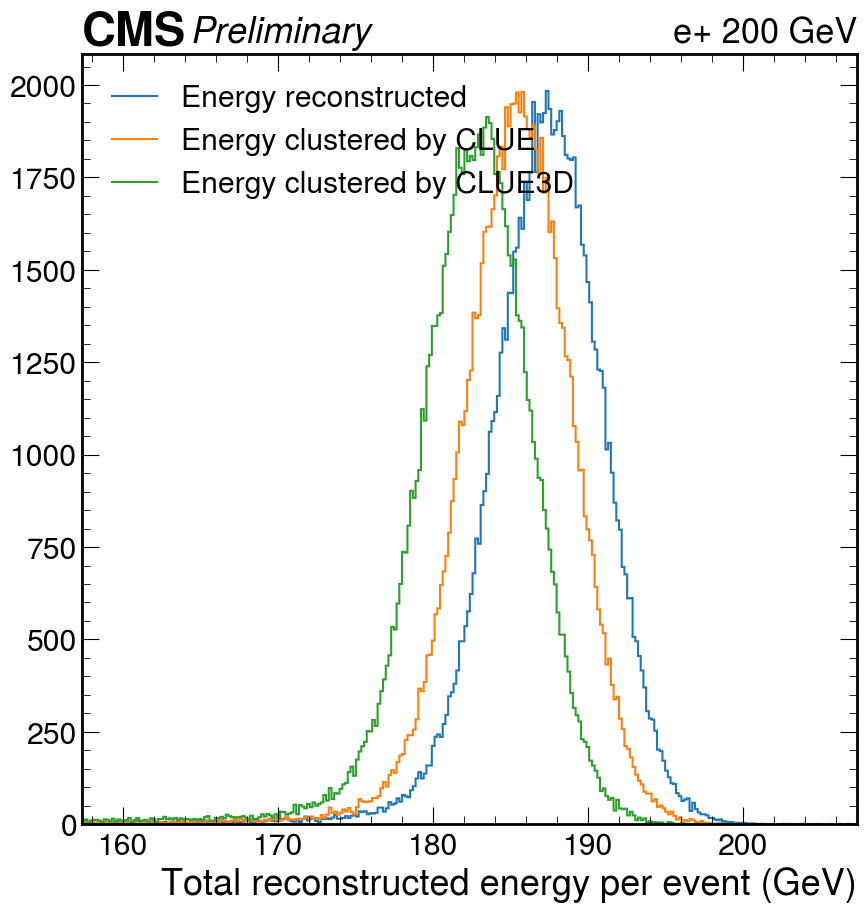

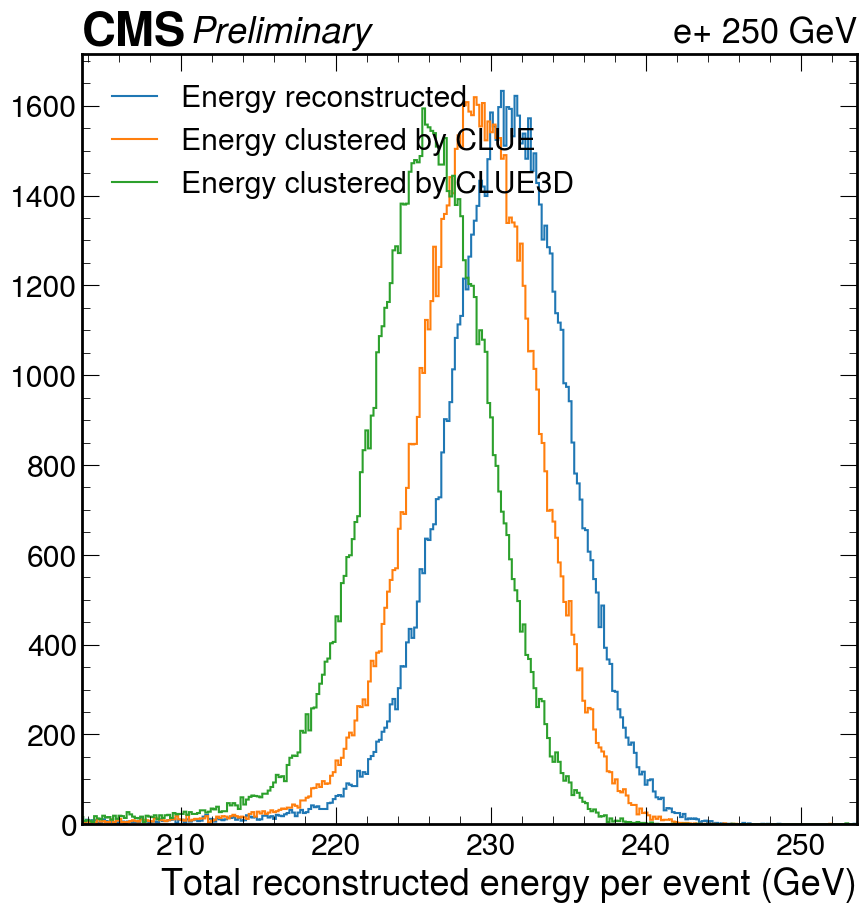

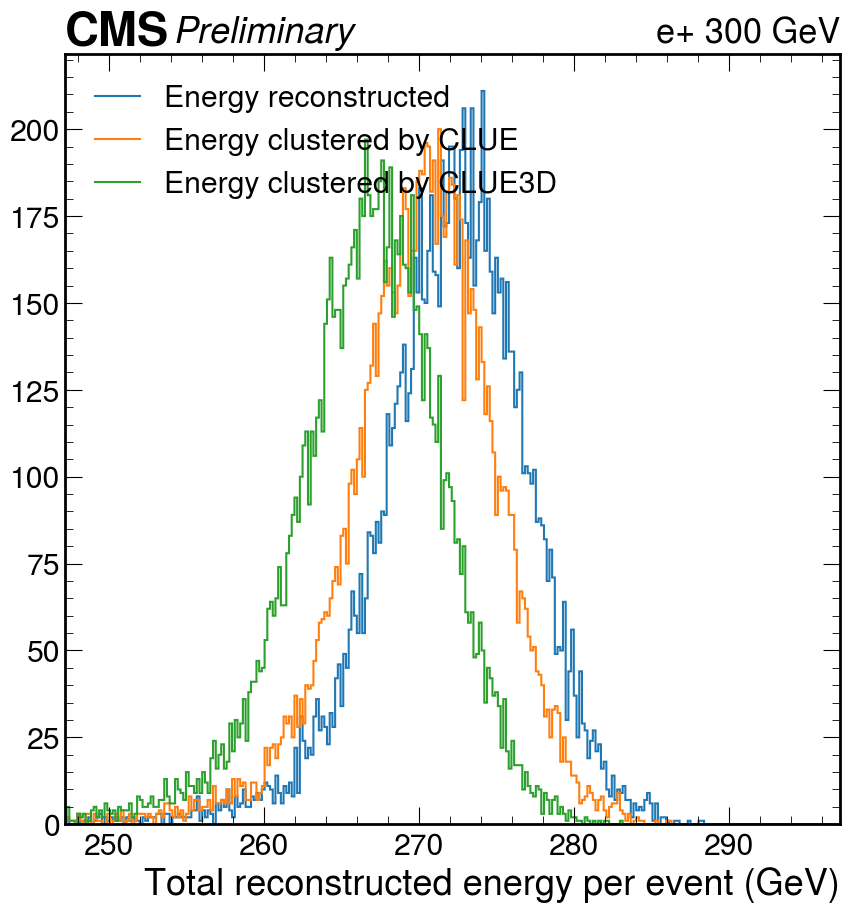

In [48]:
for beamEnergy in beamEnergies:
    plot("data", beamEnergy)

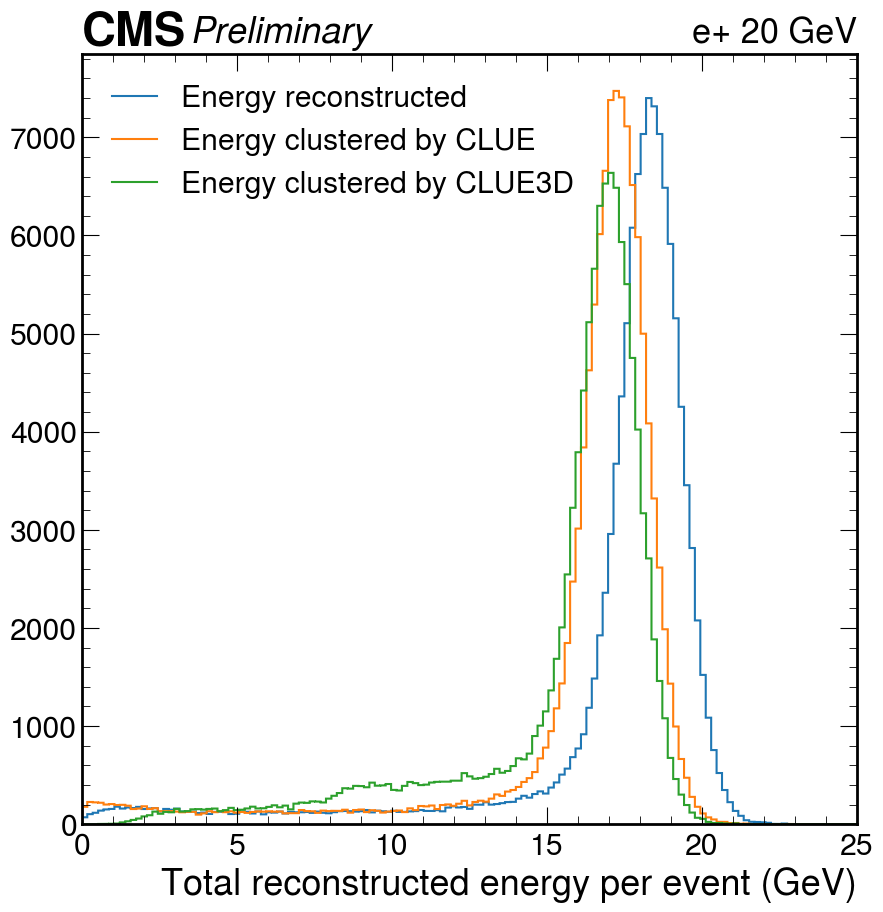

In [51]:
plot("data", 20, (0, 25))

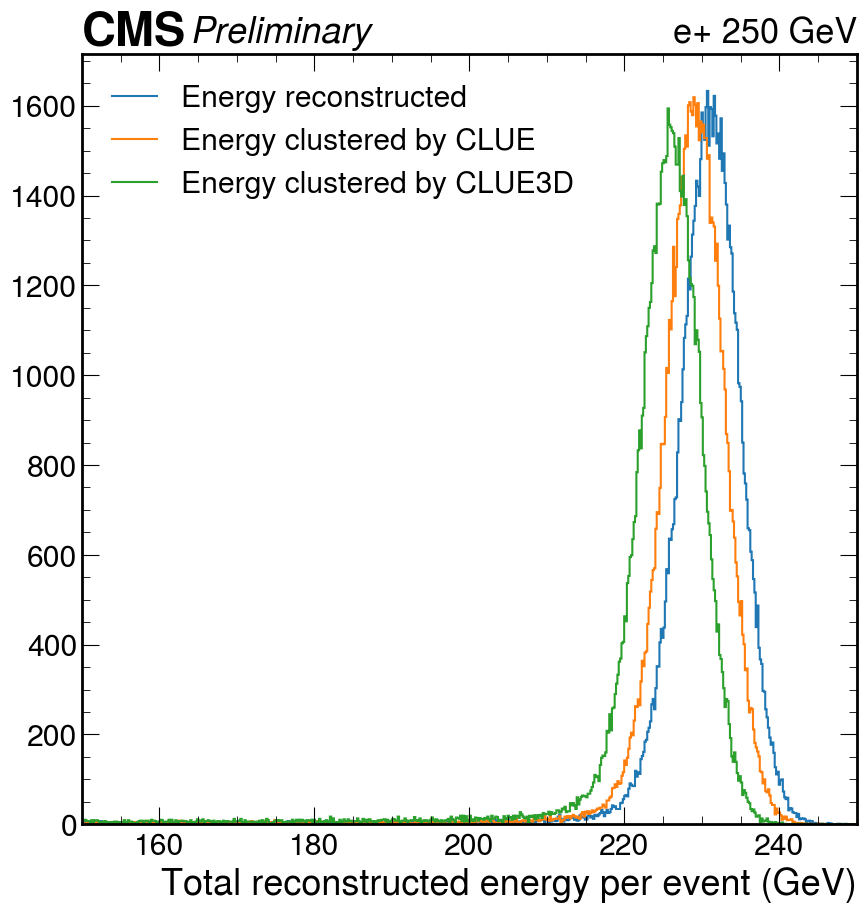

In [49]:
plot("data", 250, (150, 250))